# Classic neural networks for MNIST dataset
- test of 2 and 3 neural network layers with different hidden sizes

In [1]:
%cd /opt/notebooks/basic_of_ml_image_classification

/opt/notebooks/basic_of_ml_image_classification


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as F


from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

import time

In [7]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

#load data
train_dataset = datasets.MNIST(
    root='./data',
    train=True,
    download=False,
    transform=transform
)

test_dataset = datasets.MNIST(
    root='./data',
    train=False,
    download=False,
    transform=transform
)

### Two layers

In [11]:
class TwoLayerNet(nn.Module):
    def __init__(self, hidden_size=128):
        super(TwoLayerNet, self).__init__()
        self.fc1 = nn.Linear(28*28, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)   
        x = F.relu(self.fc1(x)) 
        x = self.fc2(x)         
        return x
    
def train_model(hidden_size, train_loader, test_loader, epochs=3, lr=0.001):
    model = TwoLayerNet(hidden_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    start_time = time.time()

    model.train()
    for epoch in range(epochs):
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    train_time = time.time() - start_time

    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())

    acc = accuracy_score(all_labels, all_preds)
    cm = confusion_matrix(all_labels, all_preds)

    return train_time, acc, cm


Testuję hidden_size = 32
Training time: 39.81 s
Accuracy: 0.9558


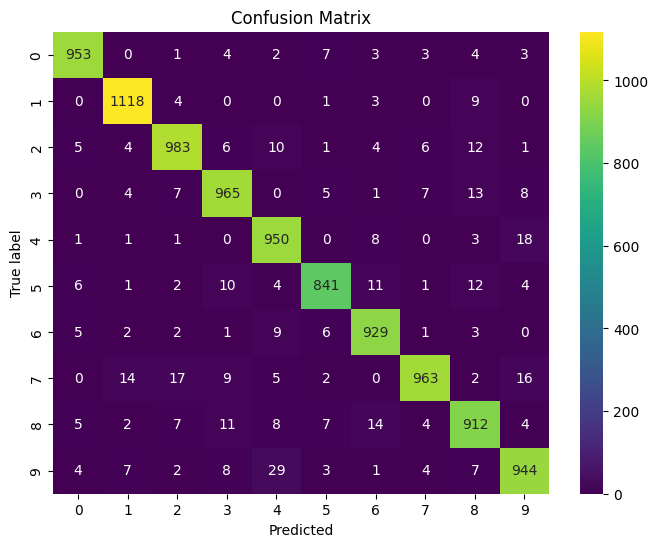


Testuję hidden_size = 64
Training time: 39.01 s
Accuracy: 0.9661


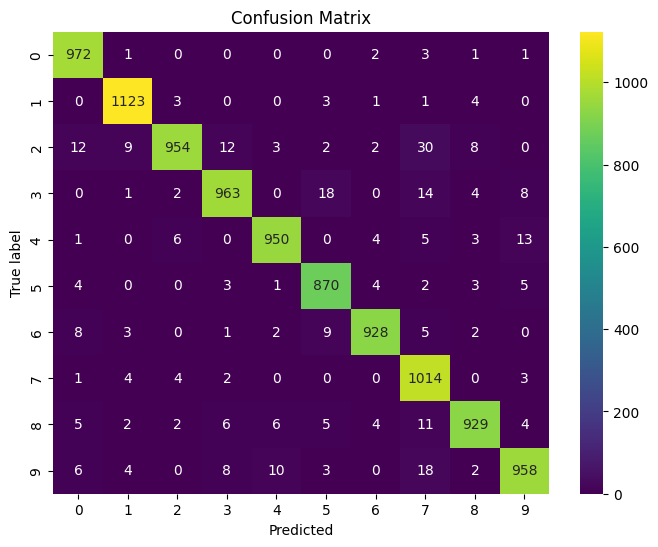


Testuję hidden_size = 128
Training time: 39.05 s
Accuracy: 0.9715


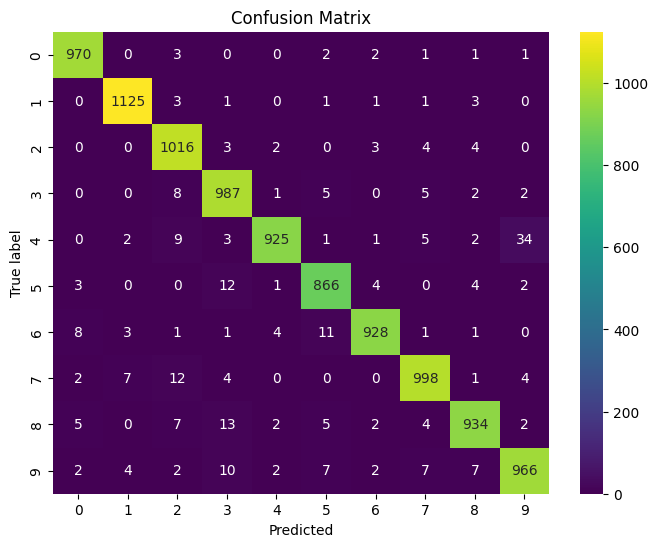


Testuję hidden_size = 256
Training time: 39.80 s
Accuracy: 0.9759


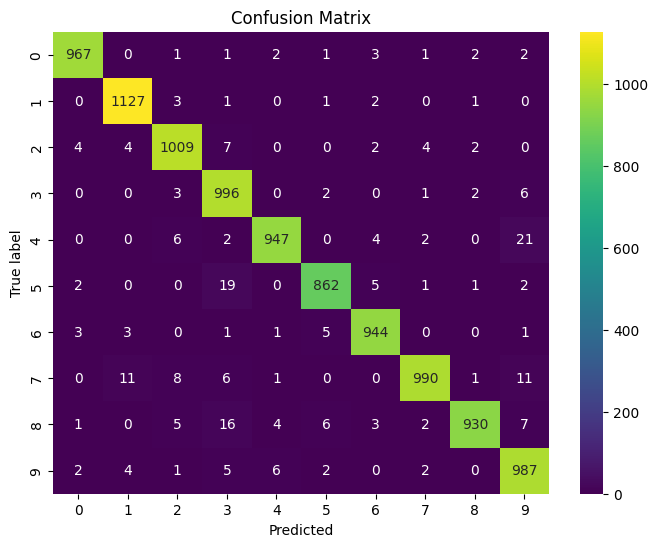

In [15]:
hidden_sizes = [32, 64, 128, 256]

results = {}

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

for h in hidden_sizes:
    print(f"\nTestuję hidden_size = {h}")
    t, acc, cm = train_model(h, train_loader, test_loader)

    results[h] = {
        "training_time": t,
        "accuracy": acc,
        "confusion_matrix": cm
    }

    print(f"Training time: {t:.2f} s")
    print(f"Accuracy: {acc:.4f}")
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
    plt.xlabel("Predicted")
    plt.ylabel("True label")
    plt.title("Confusion Matrix")
    plt.show()

### Three layers

In [ ]:
class ThreeLayerNet(nn.Module):
    def __init__(self, hidden_size1=128,hidden_size2=64):
        super(ThreeLayersNet,self).__init__()
